In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.columns = df.columns.str.replace("*","")

In [6]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
df['START']

0            Fort Pierce
1            Fort Pierce
2            Fort Pierce
3            Fort Pierce
4            Fort Pierce
              ...       
1151             Kar?chi
1152    Unknown Location
1153          Katunayake
1154             Gampaha
1155                 NaN
Name: START, Length: 1156, dtype: object

In [8]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [9]:
df.shape

(1156, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [12]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

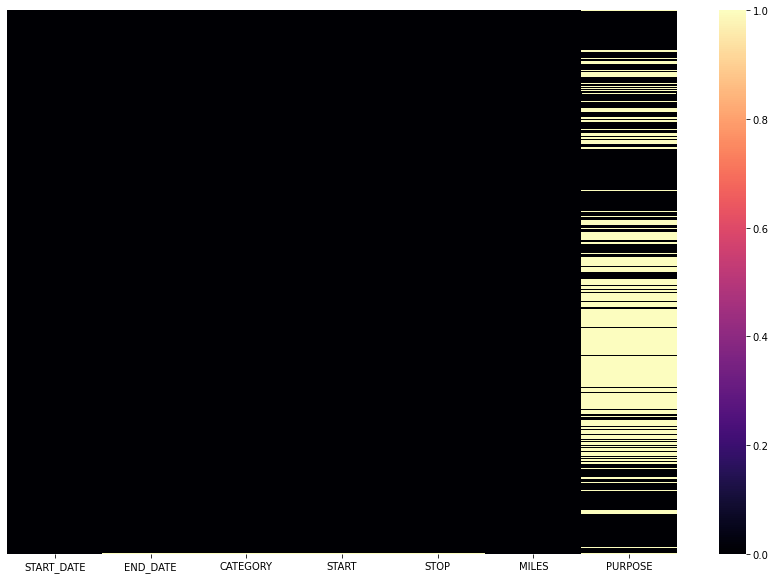

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)
plt.show()

In [14]:
null_columns = df.columns[df.isnull().any()]

In [15]:
null_columns

Index(['END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')

In [16]:
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

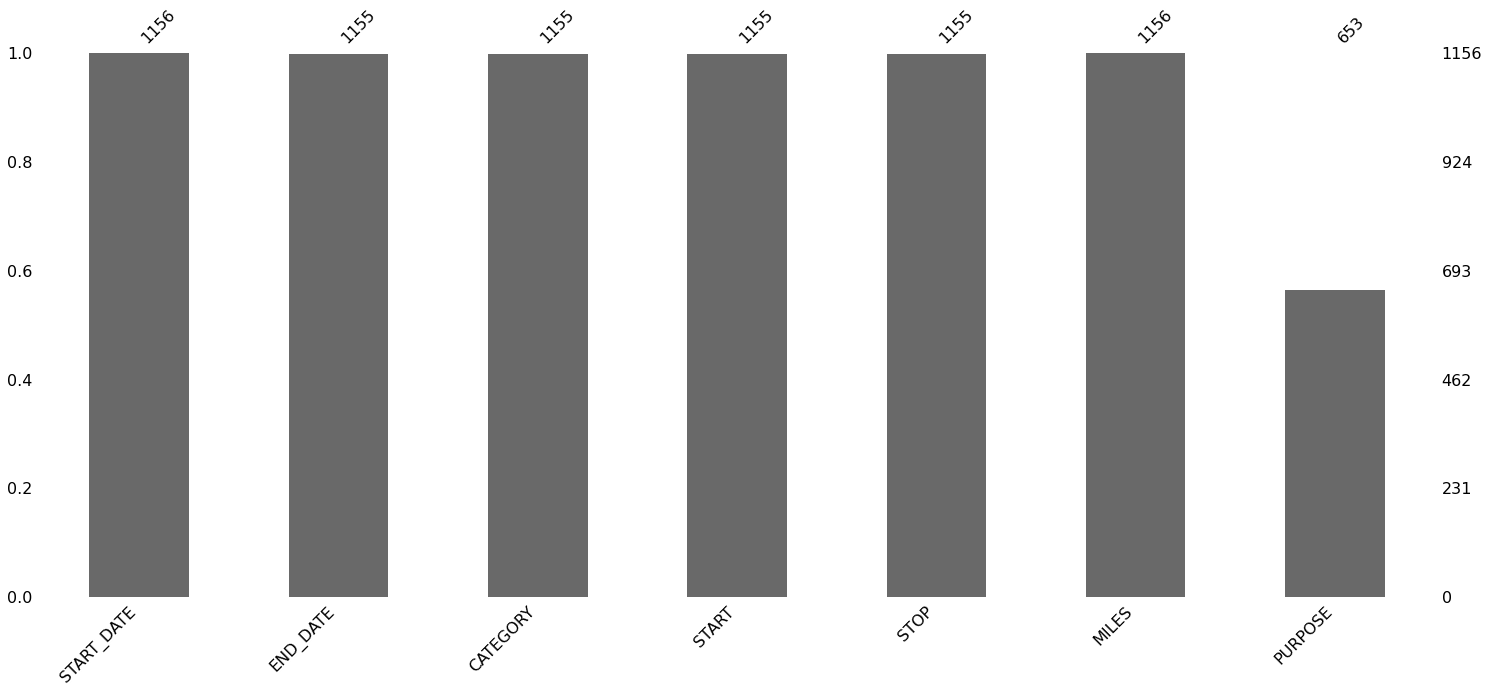

In [17]:
import missingno as msno
msno.bar(df)
plt.show()

In [18]:
df.drop(index=1155,axis=0,inplace=True)

In [19]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [20]:
df['PURPOSE'].isnull().sum()/len(df)

0.43463203463203465

In [21]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [22]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [23]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [25]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


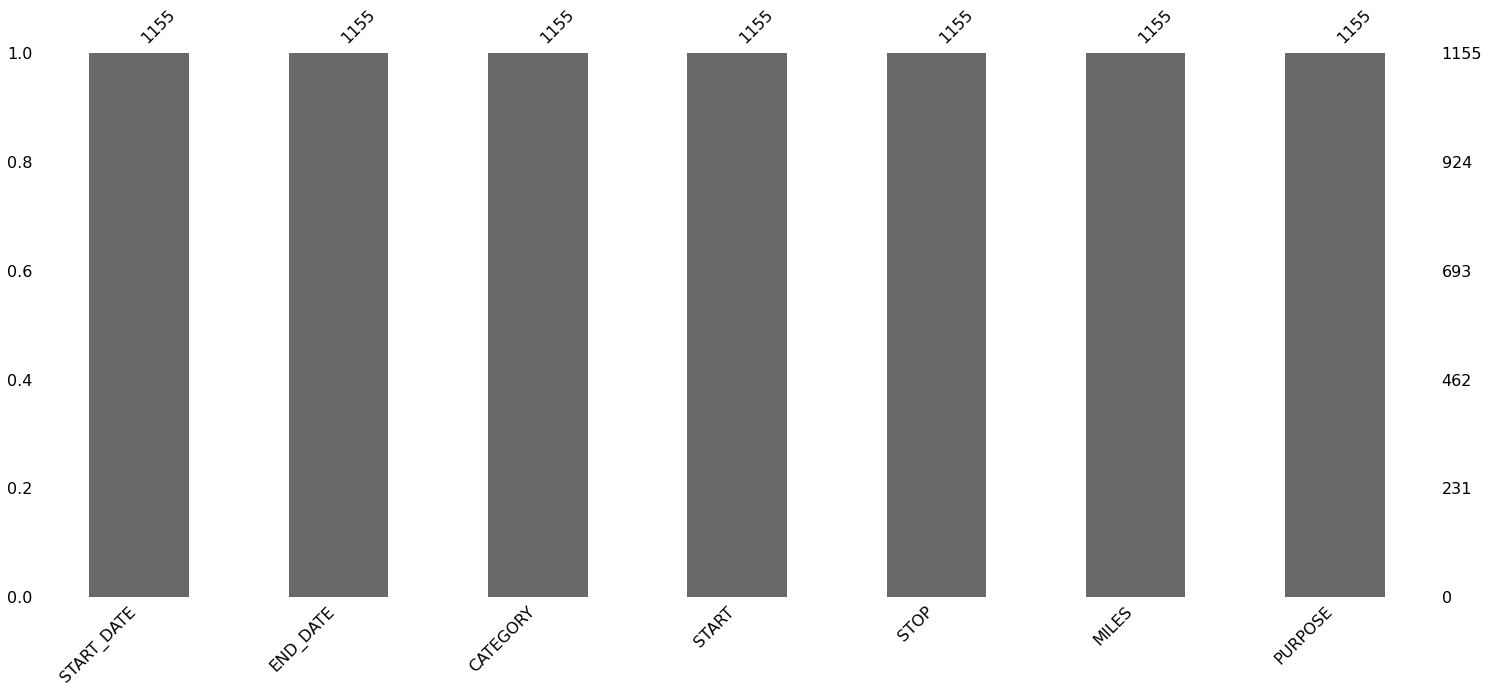

In [26]:
msno.bar(df)
plt.show()

In [27]:
category = pd.crosstab(index = df['CATEGORY'],columns = 'count of travel per category')

In [28]:
category

col_0,count of travel per category
CATEGORY,
Business,1078
Personal,77


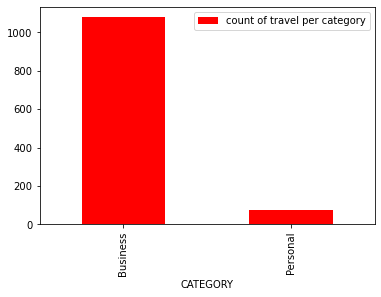

In [29]:
category.plot(kind = 'bar',color='r')
plt.legend()

In [30]:
## find the most 10 frequrnt start locations
# locations that are the start location more than 10 number of times

In [31]:
start_point = df.START.value_counts()

In [32]:
start_point

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Midtown East          1
East Austin           1
Elmhurst              1
Jackson Heights       1
Parkwood              1
Name: START, Length: 177, dtype: int64

In [33]:
start_point[start_point>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64

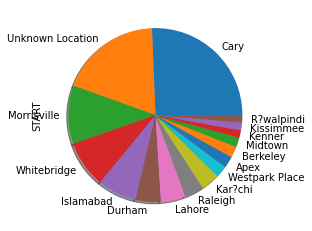

In [34]:
start_point[start_point>10].plot(kind='pie',shadow=True)
plt.show()

In [35]:
start_point[start_point<=10]

Emeryville         10
New Orleans        10
Downtown            9
San Francisco       8
Banner Elk          8
                   ..
Midtown East        1
East Austin         1
Elmhurst            1
Jackson Heights     1
Parkwood            1
Name: START, Length: 161, dtype: int64

In [36]:
miles = df.MILES.value_counts()
miles


9.9      28
3.1      26
2.1      19
10.4     19
2.5      19
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 256, dtype: int64

In [37]:
miles[miles>10]

9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES, dtype: int64

<AxesSubplot:>

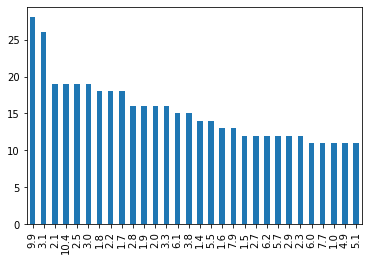

In [38]:
miles[miles>10].plot(kind='bar')

In [39]:
miles[miles<=10]

8.7      10
3.9      10
3.6      10
8.4      10
5.3      10
         ..
310.3     1
11.1      1
10.7      1
195.6     1
22.7      1
Name: MILES, Length: 226, dtype: int64

col_0,count of miles
MILES,
False,840
True,315


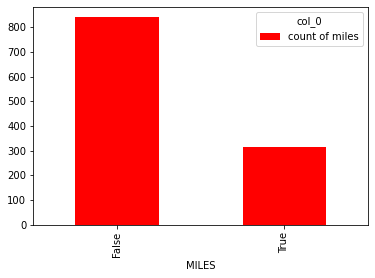

In [40]:
miles = pd.crosstab(index=df['MILES']>10,columns='count of miles')
miles.plot(kind='bar',color='r')
miles

In [41]:
df.PURPOSE.value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

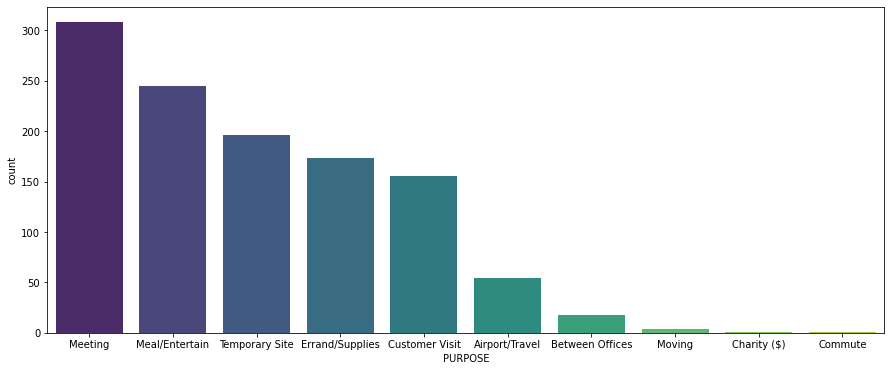

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index, palette='viridis')
plt.show()

In [43]:
df['minutes'] = df.END_DATE-df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [44]:
df['minutes'] = df['minutes'].dt.total_seconds()/60

In [45]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [47]:
pd.DataFrame({'Mean': df.groupby(['PURPOSE'])['MILES'].mean(),
              'Min': df.groupby(['PURPOSE'])['MILES'].min(),
             'Max': df.groupby(['PURPOSE'])['MILES'].max()}).reset_index()

,PURPOSE,Mean,Min,Max
0,Airport/Travel,14.953704,0.9,156.9
1,Between Offices,10.944444,1.9,39.2
2,Charity ($),15.100000,15.1,15.1
3,Commute,180.200000,180.2,180.2
4,Customer Visit,16.065806,0.6,310.3
5,Errand/Supplies,5.928902,0.5,195.3
6,Meal/Entertain,5.773878,0.6,36.5
7,Meeting,12.652597,0.7,201.0
8,Moving,4.550000,3.3,6.1
9,Temporary Site,11.016327,0.7,195.6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

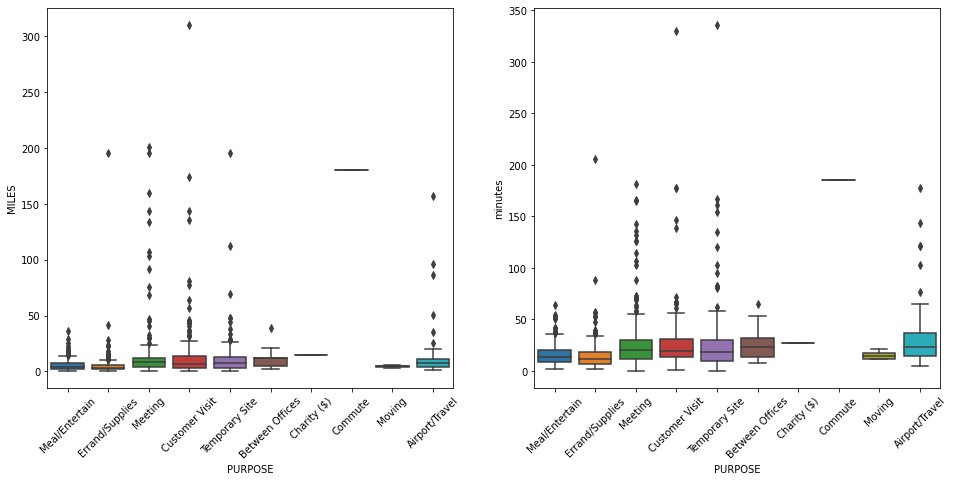

In [48]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes)
plt.xticks(rotation=45)

In [49]:
df.describe()

,MILES,minutes
count,1155.000000,1155.000000
mean,10.566840,23.243290
std,21.579106,27.318277
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.500000
max,310.300000,336.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

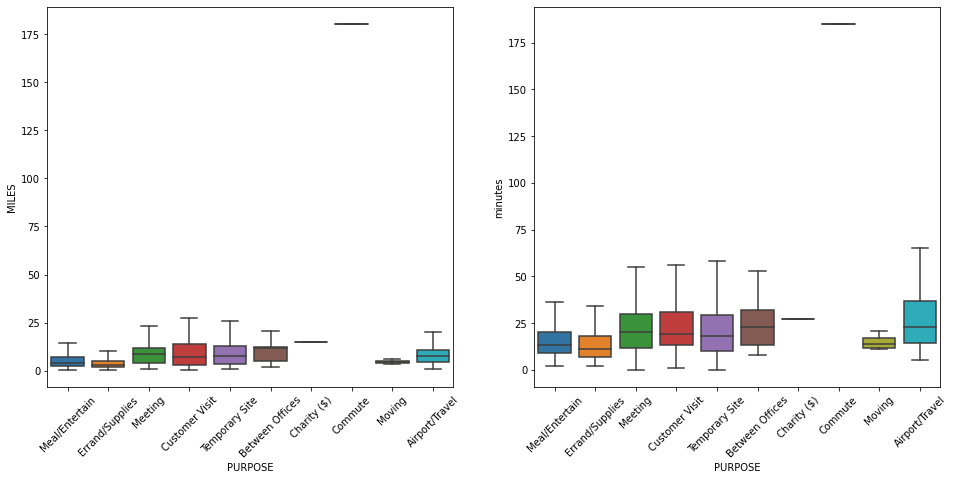

In [50]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes,showfliers=False)
plt.xticks(rotation=45)

In [53]:
# plt.figure(figsize=(8,5))
def round(x):
    if x['START']==x['STOP']:
        return 'yes'
    else:
        return 'no'
df['Roundtrip'] = df.apply(round, axis=1)

In [54]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Roundtrip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no


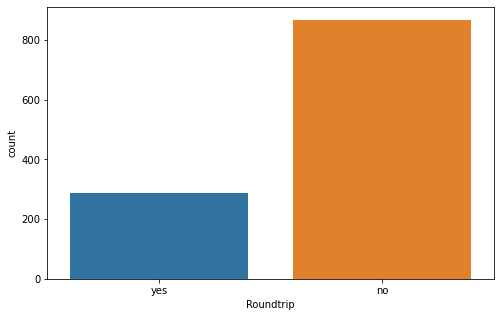

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(df['Roundtrip'])
plt.show()

In [56]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

In [57]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Roundtrip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1


In [58]:
dic = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [59]:
df['month']=df['month'].map(dic)

In [60]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Roundtrip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan


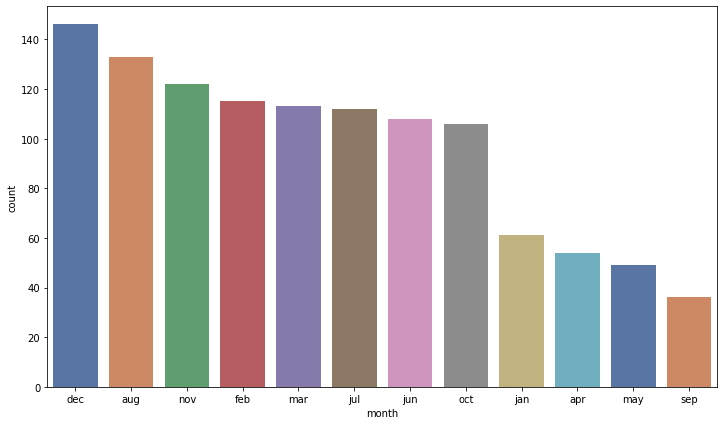

In [61]:
plt.figure(figsize=(12,7))
sns.countplot(df['month'],order=df['month'].value_counts().index,palette='deep')
plt.show()

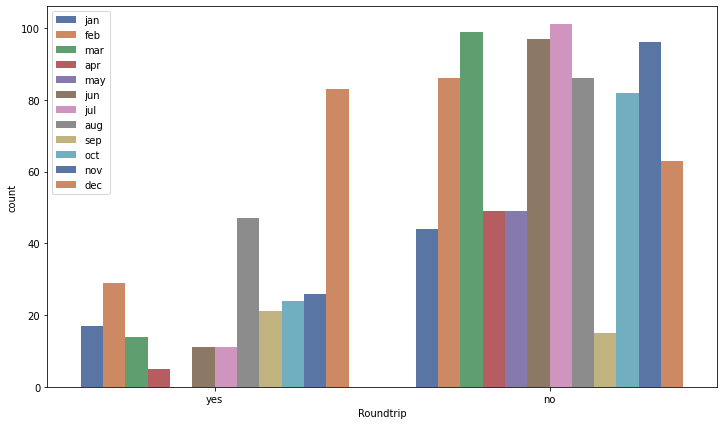

In [63]:
plt.figure(figsize=(12,7))
sns.countplot(df['Roundtrip'],hue=df['month'],palette ='deep')
plt.legend()

<AxesSubplot:xlabel='minutes', ylabel='MILES'>

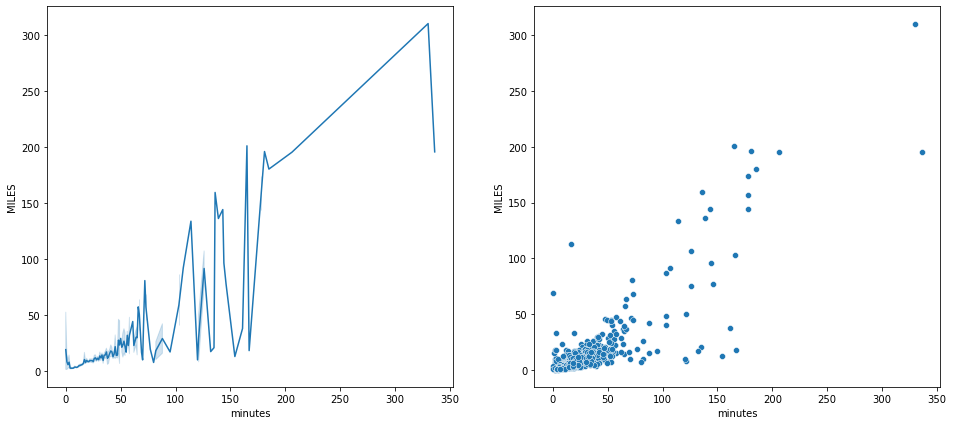

In [65]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.minutes,y=df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.minutes,y=df.MILES)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

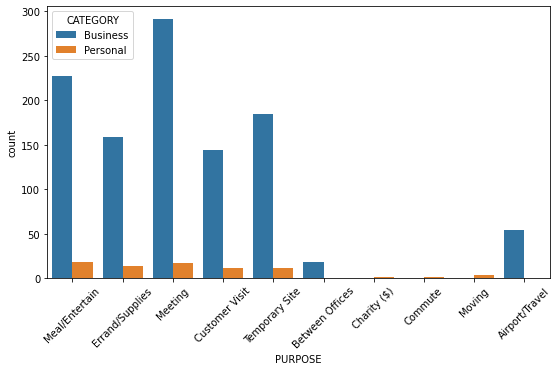

In [66]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

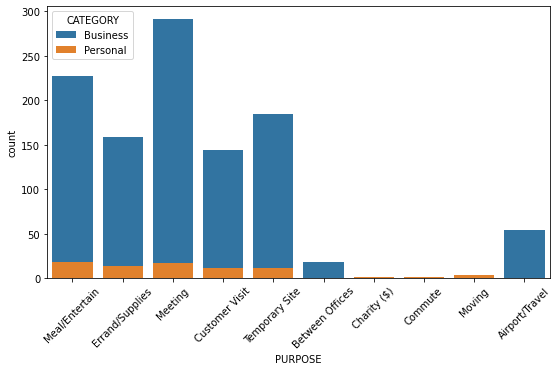

In [67]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place'),
  Text(10, 0, 'Apex'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'Midtown'),
  Text(13, 0, 'Kenner'),
  Text(14, 0, 'Kissimmee'),
  Text(15, 0, 'R?walpindi'),
  Text(16, 0, 'Emeryville'),
  Text(17, 0, 'New Orleans'),
  Text(18, 0, 'Downtown'),
  Text(19, 0, 'San Francisco'),
  Text(20, 0, 'Banner Elk'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Orlando'),
  Text(23, 0, 'Edgehill Farms'),
  Text(24, 0, 'Central')])

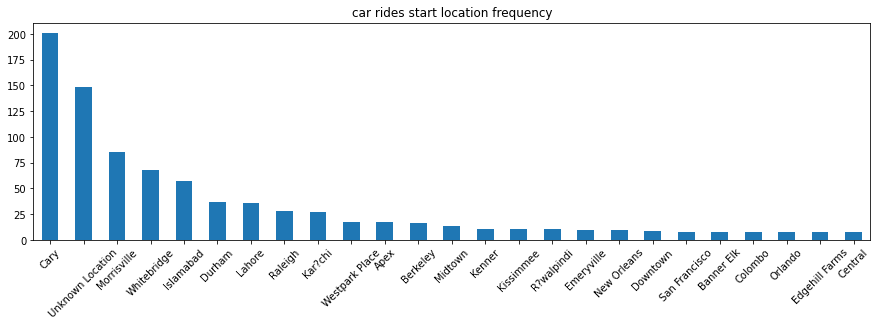

In [68]:
plt.figure(figsize=(15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind='bar')
plt.title('car rides start location frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex'),
  Text(10, 0, 'Westpark Place'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'R?walpindi'),
  Text(13, 0, 'Kissimmee'),
  Text(14, 0, 'Midtown'),
  Text(15, 0, 'Edgehill Farms'),
  Text(16, 0, 'Kenner'),
  Text(17, 0, 'New Orleans'),
  Text(18, 0, 'Emeryville'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'Banner Elk'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Oakland'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'The Drag')])

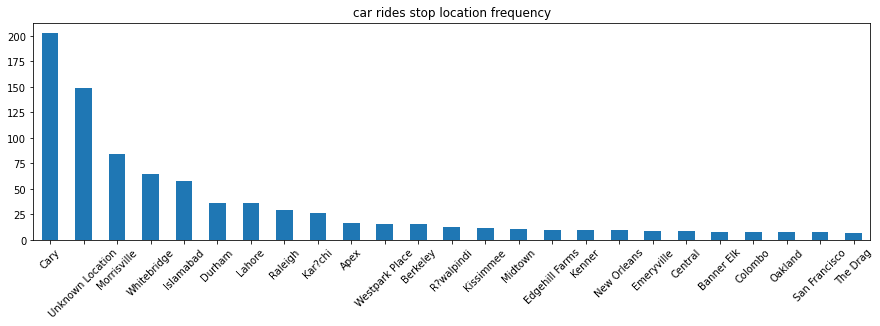

In [69]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind='bar')
plt.title('car rides stop location frequency')
plt.xticks(rotation=45)